IMPORTACAO

In [1]:
import sidrapy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

REQUISICAO NA API

In [2]:
data = sidrapy.get_table(table_code='4660', territorial_level='1', ibge_territorial_code='all', territorial_sel='all', period='all')

SETANDO COLUNAS

In [3]:
data.columns = data.iloc[0]

DROPANDO PRIMEIRA LINHA

In [4]:
data.drop(0, inplace=True)

INFORMACAO DO DATAFRAME

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Nível Territorial (Código)  52 non-null     object
 1   Nível Territorial           52 non-null     object
 2   Unidade de Medida (Código)  52 non-null     object
 3   Unidade de Medida           52 non-null     object
 4   Valor                       52 non-null     object
 5   Brasil (Código)             52 non-null     object
 6   Brasil                      52 non-null     object
 7   Ano (Código)                52 non-null     object
 8   Ano                         52 non-null     object
 9   Variável (Código)           52 non-null     object
 10  Variável                    52 non-null     object
dtypes: object(11)
memory usage: 4.6+ KB


CONVERTENDO DADOS DA COLUNA VALOR PARA NUMERIC

In [6]:
data['Valor'] = pd.to_numeric(data['Valor'])

CONVERTENDO DADOS DA COLUNA ANO PARA DATETIME

In [7]:
data['Ano'] = pd.to_datetime(data['Ano'])

DROPANDO COLUNAS

In [8]:
data = data.drop(columns=['Brasil (Código)', 'Nível Territorial (Código)', 'Nível Territorial', 'Brasil'])

CRIACAO DE NOVOS DFS

In [9]:
df_real = data[data['Variável (Código)'] == '5933'].copy()
df_nominal = data[data['Variável (Código)'] == '5929'].copy()
df_variacao = data[data['Variável (Código)'] == '5941'].copy()

VERIFICANDO NUMERO DE LINHAS POR DF

In [10]:
print(len(df_real))
print(len(df_nominal))
print(len(df_variacao))

13
13
13


VISUALIZACAO

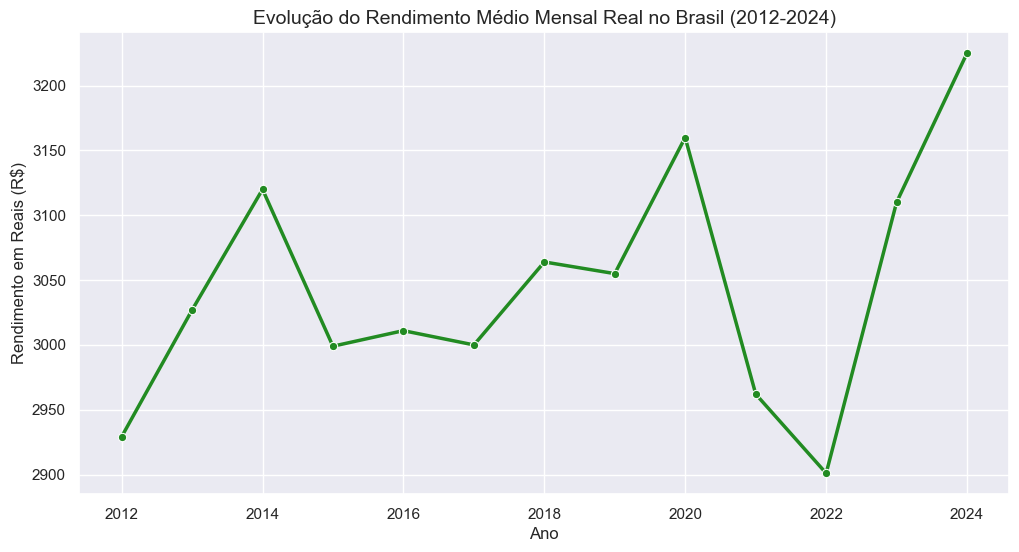

In [11]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_real, x='Ano', y='Valor', marker='o', color='forestgreen', linewidth=2.5)
plt.title('Evolução do Rendimento Médio Mensal Real no Brasil (2012-2024)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Rendimento em Reais (R$)', fontsize=12)
plt.savefig('evolucao_rendimento_mensal_real.png', dpi=300, bbox_inches='tight')
plt.show()

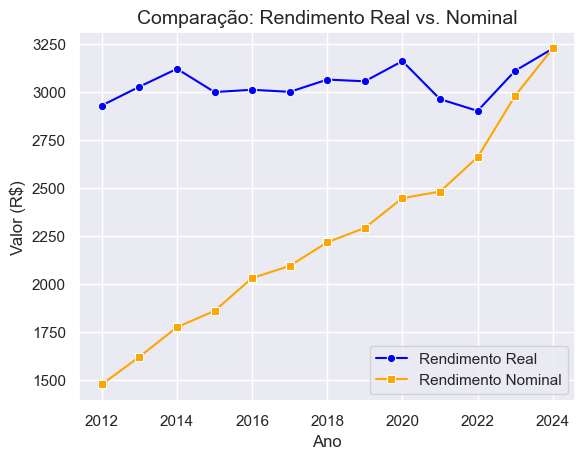

In [12]:
plt.Figure(figsize=(12,5))
sns.lineplot(data=df_real, x='Ano', y='Valor', marker='o', label='Rendimento Real', color='blue')
sns.lineplot(data=df_nominal, x='Ano', y='Valor', marker='s', label='Rendimento Nominal', color='orange')
plt.title('Comparação: Rendimento Real vs. Nominal', fontsize=14)
plt.ylabel('Valor (R$)')
plt.legend()
plt.savefig('comparacao_rendimento_real_vs_nominal.png', dpi=300, bbox_inches='tight')
plt.show()

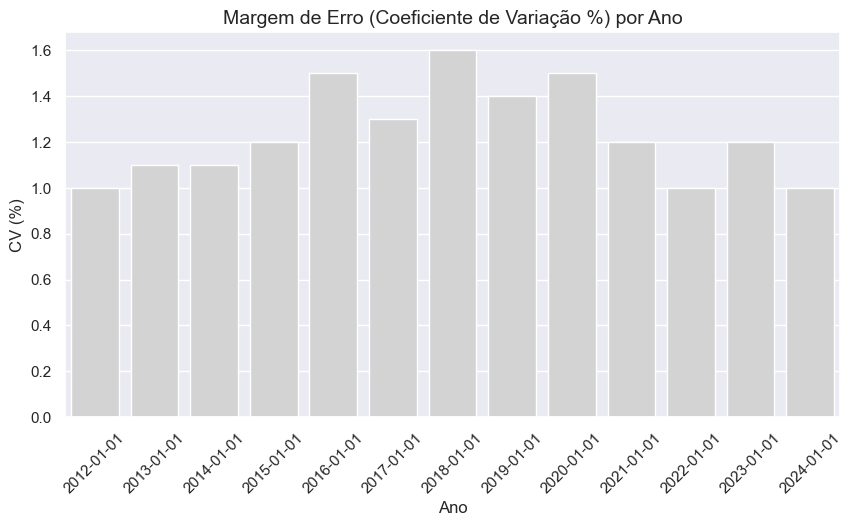

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_variacao, x='Ano', y='Valor', color='lightgray')
plt.title('Margem de Erro (Coeficiente de Variação %) por Ano', fontsize=14)
plt.ylabel('CV (%)')
plt.xticks(rotation=45) 
plt.savefig('margem_de_erro_por_ano.png', dpi=300, bbox_inches='tight')
plt.show()

📑 Relatório de Insights: Rendimento Médio do Trabalho (PNAD Contínua)
1. Recuperação Histórica do Poder de Compra
Após um período de estagnação e queda entre 2020 e 2022 (reflexo dos impactos econômicos da pandemia e inflação), o rendimento médio real em 2024 atingiu seu ápice histórico na série iniciada em 2012.

O que isso diz: O mercado de trabalho não apenas recuperou as perdas, mas superou o teto anterior, indicando um aquecimento real da economia e do ganho salarial.

2. O "Abismo" entre Nominal e Real
O gráfico comparativo revela uma distância crescente entre as duas linhas. Enquanto o rendimento Nominal disparou, o Real levou quase uma década para romper a barreira dos R$ 3.000,00.

O que isso diz: Este é o registro visual da inflação. O trabalhador recebe mais notas de dinheiro, mas o poder de compra (o que o dinheiro realmente traz do supermercado) demorou muito mais para evoluir.

3. Qualidade e Precisão dos Dados
O Coeficiente de Variação (CV) mantendo-se estável e baixo (próximo a 1,5%) valida a robustez da pesquisa do IBGE.

O que isso diz: As oscilações observadas nos gráficos são tendências reais de mercado e não erros amostrais ou ruídos estatísticos.